In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_labels[0]

9

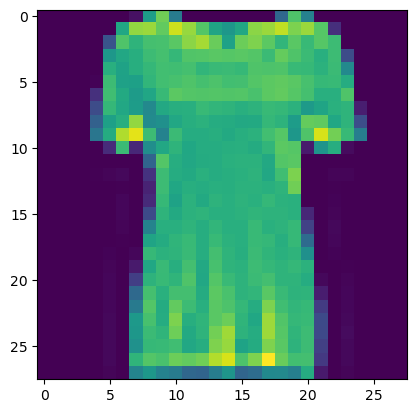

In [7]:
# plot one image
import matplotlib.pyplot as plt 
plt.imshow(train_data[10])

In [9]:
train_labels[10]

0

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

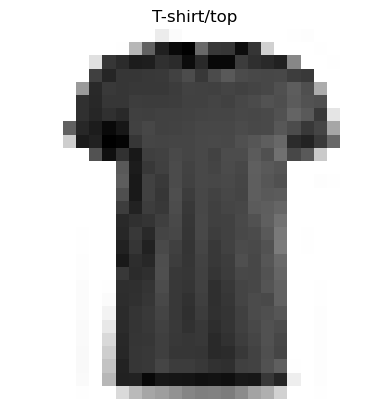

In [12]:
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])
plt.axis(False)

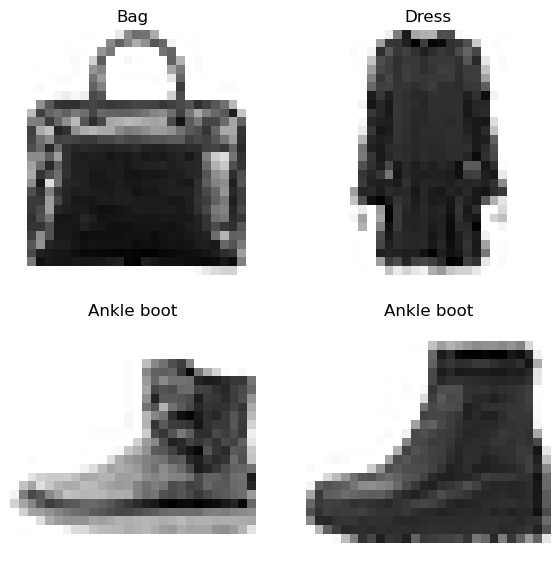

In [26]:
import random 
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [28]:
# normilization 
train_data = train_data/ 255
test_data = test_data / 255 

train_data.min(), train_data.max()

(0.0, 1.0)

In [32]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


norm_history = model_1.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0760 - accuracy: 0.5884 - val_loss: 0.7832 - val_accuracy: 0.7205
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6387 - accuracy: 0.7785 - val_loss: 0.6038 - val_accuracy: 0.7928
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5651 - accuracy: 0.8055 - val_loss: 0.5706 - val_accuracy: 0.8038
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5446 - accuracy: 0.8124 - val_loss: 0.5571 - val_accuracy: 0.8064
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5313 - accuracy: 0.8181 - val_loss: 0.5537 - val_accuracy: 0.8074
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5234 - accuracy: 0.8195 - val_loss: 0.5452 - val_accuracy: 0.8118
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5159 - accuracy: 0.8224 - val_loss: 0.5615 - val_accuracy:

<Axes: >

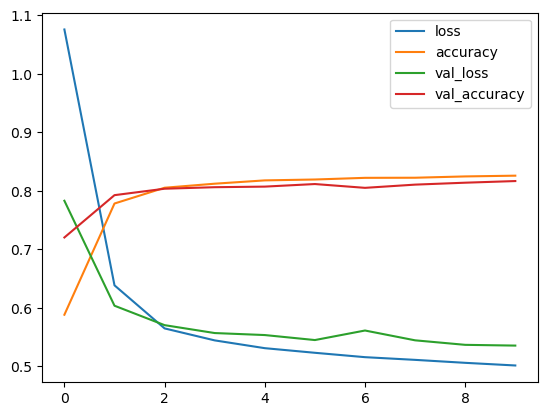

In [33]:
import pandas as pd 
pd.DataFrame(norm_history.history).plot()

In [40]:
# let's find a learning rate

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_2 = model_2.fit(train_data, 
                       train_labels, 
                       epochs = 40, 
                       callbacks = [lr],
                       validation_data=(test_data, test_labels))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3949 - accuracy: 0.4703 - val_loss: 1.0560 - val_accuracy: 0.6396 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8998 - accuracy: 0.6739 - val_loss: 0.8326 - val_accuracy: 0.6811 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7956 - accuracy: 0.6928 - val_loss: 0.7922 - val_accuracy: 0.7026 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7347 - accuracy: 0.7411 - val_loss: 0.7117 - val_accuracy: 0.7537 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6812 - accuracy: 0.7625 - val_loss: 0.7118 - val_accuracy: 0.7533 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6590 - accuracy: 0.7694 - val_loss: 0.6919 - val_accuracy: 0.7510 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

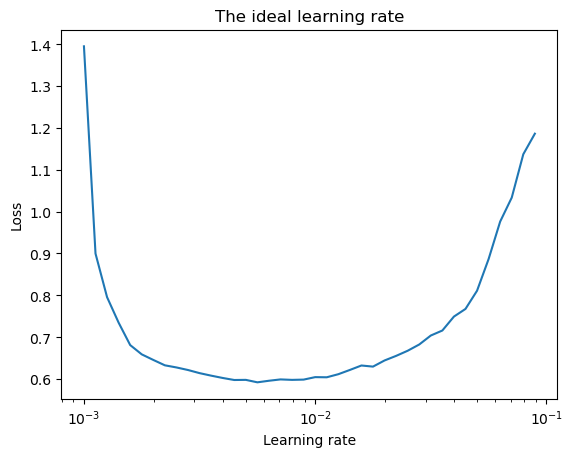

In [42]:
import numpy as np 
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("The ideal learning rate");

 lr seems to be the best at  0.0089. Let's see

In [58]:
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0089),
                 metrics=["accuracy"])

history_3 = model_2.fit(train_data, 
                       train_labels, 
                       epochs = 40, 
                       validation_data=(test_data, test_labels))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7300 - accuracy: 0.1951 - val_loss: 1.7318 - val_accuracy: 0.1960
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7299 - accuracy: 0.1972 - val_loss: 1.7259 - val_accuracy: 0.1885
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7297 - accuracy: 0.1983 - val_loss: 1.7332 - val_accuracy: 0.1961
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7314 - accuracy: 0.1935 - val_loss: 1.7420 - val_accuracy: 0.1978
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7326 - accuracy: 0.1943 - val_loss: 1.7384 - val_accuracy: 0.1982
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7307 - accuracy: 0.1957 - val_loss: 1.7350 - val_accuracy: 0.1955
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7316 - accuracy: 0.1950 - val_loss: 1.7426 - val_accuracy:

<Axes: >

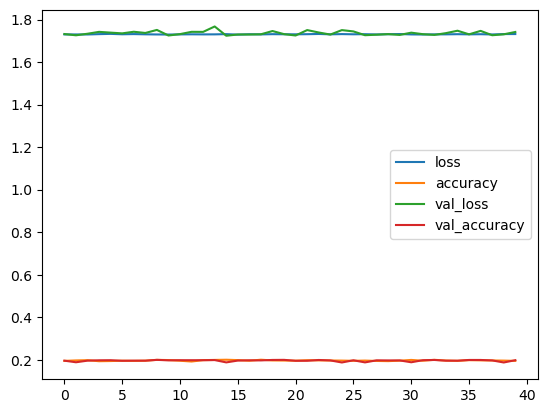

In [59]:
pd.DataFrame(history_3.history).plot()

It seems like the model performance has worsened. The default learning rate is good and giving better metrics so we will got with model 2

In [61]:
# let's make prediction
y_probs = model_2.predict(test_data)
y_probs[0]

313/313 [==============================] - 0s 1ms/step


array([0.00171238, 0.00134523, 0.00175137, 0.00129732, 0.00134885,
       0.33605322, 0.00166967, 0.32184696, 0.1906197 , 0.14235528],
      dtype=float32)

In [64]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

We selected the max probability and the related class name and here is our ouput

In [65]:
y_preds = y_probs.argmax(axis = 1)   # converting to max probability for each class

In [67]:
y_preds[:10]

array([5, 1, 1, 1, 1, 1, 1, 1, 5, 5])

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

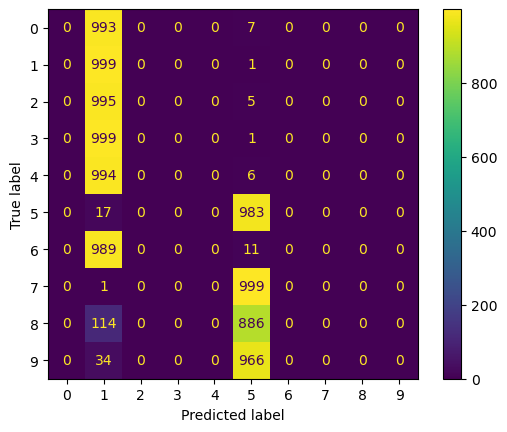

In [72]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

It seems like our model is confusing a lot and not performing well

In [84]:
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") ])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                 metrics=["accuracy"])

# Fit the model
history = model_4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2641 - accuracy: 0.5451 - val_loss: 0.8622 - val_accuracy: 0.7021
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7694 - accuracy: 0.7283 - val_loss: 0.7266 - val_accuracy: 0.7385
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6855 - accuracy: 0.7528 - val_loss: 0.6916 - val_accuracy: 0.7557
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6416 - accuracy: 0.7711 - val_loss: 0.6397 - val_accuracy: 0.7716
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6179 - accuracy: 0.7824 - val_loss: 0.6440 - val_accuracy: 0.7710
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6007 - accuracy: 0.7895 - val_loss: 0.6174 - val_accuracy: 0.7839
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5899 - accuracy: 0.7933 - val_loss: 0.6142 - val_accuracy:

<Axes: >

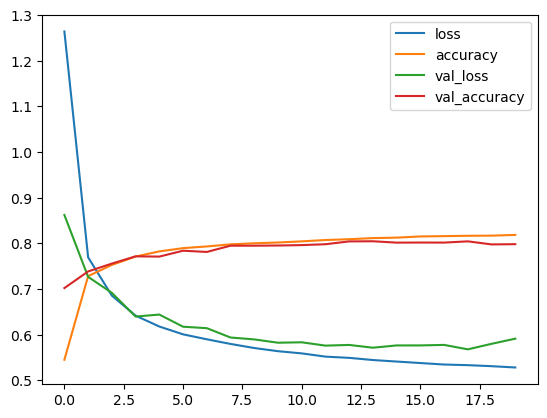

In [86]:
pd.DataFrame(history.history).plot()

In [89]:
y_probs = model_4.predict(test_data)
y_preds = y_probs.argmax(axis = 1)
cm = confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

313/313 [==============================] - 0s 1ms/step


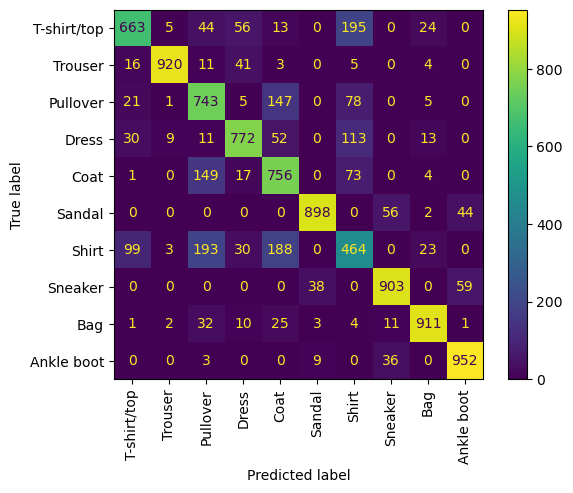

In [115]:
cmd = ConfusionMatrixDisplay(cm, display_labels = class_names)
cmd.plot(xticks_rotation = "vertical")
plt.show()

Well, our model has improved after adding lr in Adam optimizer but still it is confusing with some classes. Maybe we can add more data and train or add layers and train. 

In [117]:
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [121]:
model_4.layers

In [127]:
weights, biases = model_4.layers[1].get_weights()

In [128]:
weights

array([[-0.02335919,  0.11687471, -0.0063143 ,  0.7371094 ],
       [ 0.662387  , -0.29908442, -0.1483147 ,  0.90486205],
       [ 0.19810879, -0.17045577,  0.5598243 ,  1.0724595 ],
       ...,
       [ 0.37192702,  0.14758348,  0.45291683, -0.5017668 ],
       [ 0.40469497,  0.8176526 ,  0.3886368 , -0.49738556],
       [-0.2500754 , -0.0461604 ,  1.0552307 ,  0.29275826]],
      dtype=float32)

In [129]:
biases

array([3.0391958 , 1.586256  , 0.84263223, 1.5568676 ], dtype=float32)

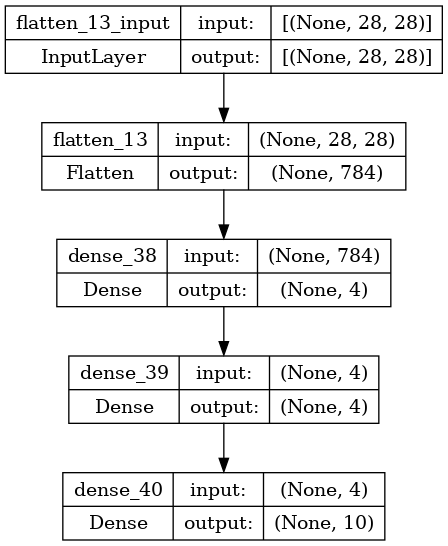

In [131]:
keras.utils.plot_model(model_4, show_shapes = True)